### Simple Linear Regression

#### import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### load the data

In [2]:
df = pd.read_csv('./Salary_Data.csv')

#### analyze the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  33 non-null     float64
 1   Salary           33 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 656.0 bytes


In [4]:
df.describe()

,YearsExperience,Salary
count,33.000000,33.000000
mean,5.921212,82760.303030
std,3.342413,34014.620992
min,1.100000,37731.000000
25%,3.200000,56957.000000
50%,5.100000,67938.000000
75%,8.700000,109431.000000
max,13.000000,156000.000000


In [5]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

#### visualize the data

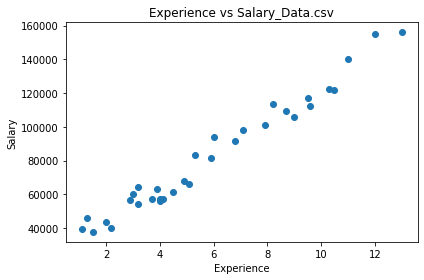

In [12]:
plt.scatter(df['YearsExperience'], df["Salary"])
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary_Data.csv")
plt.tight_layout()

#### find the variable dependencies

In [13]:
# find the correlation between Salary and YearsExperience
correlation = np.corrcoef(df["YearsExperience"], df["Salary"])
print(correlation)

[[1.         0.98364228]
 [0.98364228 1.        ]]


In [14]:
# find the correlation amongst all the variables in the df
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.983642
Salary,0.983642,1.000000


#### prepare the data for ML model

In [10]:
# remove the dependent variable from the df
# so that df will have only the independent variable(s)
# x must be multi dimensional array / data frame
x = df.drop("Salary", axis=1)
print(f"x: ndim = {x.ndim}, shape = {x.shape}")

# get the dependent variable (y)
# y must be one dimensional array / Series
y = df['Salary']b
print(f"y: ndim = {y.ndim}, shape = {y.shape}")

x: ndim = 2, shape = (33, 1)
y: ndim = 1, shape = (33,)


#### create and train the model

In [32]:
from sklearn.linear_model import LinearRegression

# create the model
model = LinearRegression()

# get the list of hyper parameters
# hyper parameters are used to fine tune the model
params = model.get_params()
print(params)

# train the model
# understand the relationship and create the formula for predicting the future values
model.fit(x, y)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}


LinearRegression()

In [48]:
# get the formula used by the model to predict the values
print(model.coef_)
print(model.intercept_)

[10010.1995026]
23487.78839975789


In [52]:
# find the known and known salary for an employee of 1.1 yrs experience
print(f"as per the observed values the salary for 1.1 yrs exp employee = {y[0]}")
print(f"as per the model the salary for 1.1 yrs exp employee = {model.predict([[1.1]])[0]}")

as per the observed values the salary for 1.1 yrs exp employee = 39343
as per the model the salary for 1.1 yrs exp employee = 34499.00785261761


In [53]:
# formula used by the model to predict the value
# y = mx + c
# where
# - x = experience = 1.1
# - m = slope (coefficient for exprience) = 10010.1995026
# - c = constant = 23487.78839975789
y_predicted = (10010.1995026 * 1.1) + 23487.78839975789
print(f"predicted salary = {y_predicted}")

predicted salary = 34499.00785261789


#### visualize the result (render the best fit regression line)

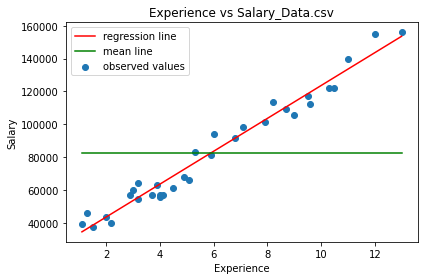

In [67]:
# predict the salaries for the known data (known experiences from x)
predictions = model.predict(x)

# find out the mean for the x
mean = df['Salary'].mean()
mean_values = np.ones(len(x)) * mean

# plot the known records
plt.scatter(df['YearsExperience'], df["Salary"], label="observed values")

# plot the salaries predicted by the model
# plt.scatter(df['YearsExperience'], predictions, color="red")
plt.plot(df['YearsExperience'], predictions, color="red", label="regression line")

# mean line
plt.plot(df['YearsExperience'], mean_values, color="green", label="mean line")

plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary_Data.csv")
plt.legend()
plt.tight_layout()

#### use the model and predict salary for an employee having 14 years of experience

In [54]:
# the predict method returns a multidimensional array
salaries = model.predict([
    [14]
])

# formula the model is using behind the scene to calculate the future values
y_predicted = (10010.1995026 * 14) + 23487.78839975789

print(f"salary for an employee with 14 years of experience will be (using model)   : ${salaries[0]:.2f}")
print(f"salary for an employee with 14 years of experience will be (using formula) : ${y_predicted:.2f}")

salary for an employee with 14 years of experience will be (using model)   : $163630.58
salary for an employee with 14 years of experience will be (using formula) : $163630.58
